<a href="https://colab.research.google.com/github/UrienLin/CathayExam/blob/master/Q1_Filter_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 刪除每一個檔案的header 才做合併
# 合併後 重新定義 index

In [0]:
import pandas as pd
#path = '/content/drive/My Drive/download/'
path = './'
df_a = pd.read_csv(path + 'a_lvr_land_a.csv')[1:]
df_b = pd.read_csv(path + 'b_lvr_land_a.csv')[1:]
df_e = pd.read_csv(path + 'e_lvr_land_a.csv')[1:]
df_f = pd.read_csv(path + 'f_lvr_land_a.csv')[1:]
df_h = pd.read_csv(path + 'h_lvr_land_a.csv')[1:]
list_df = [df_a, df_b, df_e, df_f, df_h]
df_all = pd.concat(list_df).reset_index(drop=True)

# 列出所有欄位

In [0]:
list(df_all.columns)

['鄉鎮市區',
 '交易標的',
 '土地區段位置建物區段門牌',
 '土地移轉總面積平方公尺',
 '都市土地使用分區',
 '非都市土地使用分區',
 '非都市土地使用編定',
 '交易年月日',
 '交易筆棟數',
 '移轉層次',
 '總樓層數',
 '建物型態',
 '主要用途',
 '主要建材',
 '建築完成年月',
 '建物移轉總面積平方公尺',
 '建物現況格局-房',
 '建物現況格局-廳',
 '建物現況格局-衛',
 '建物現況格局-隔間',
 '有無管理組織',
 '總價元',
 '單價元平方公尺',
 '車位類別',
 '車位移轉總面積平方公尺',
 '車位總價元',
 '備註',
 '編號']

#確認 [交易筆棟數] ，格式為 '土地int建物int車位int'
#共同項目為 土地、建物、車位 ，故以其作為切點

In [0]:
def split_park(str_input):
  sub_str_list = str_input.split('土地')[1].split('建物')
  land = int(sub_str_list[0])
  buildings = int(sub_str_list[1].split('車位')[0])
  park = int(sub_str_list[1].split('車位')[1])
  return [land,buildings,park]


df_all['LBP'] = df_all['交易筆棟數'].apply(split_park)
_df = pd.DataFrame(list(df_all.LBP))
_df.columns = ['土地', '建物', '車位']
df_all = df_all.join(_df)
#確認一下沒有都為0的資料
df_all[(df_all['土地'] == 0) & (df_all['建物'] == 0) & (df_all['車位'] == 0)]

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,LBP,土地,建物,車位


In [0]:
#抽樣確認<交易標的>與<交易筆棟數>資料意義相同
df_all[['交易標的','土地','建物','車位']].sample(10)

,交易標的,土地,建物,車位
3537,房地(土地+建物)+車位,1,1,1
3,房地(土地+建物)+車位,1,1,1
527,房地(土地+建物)+車位,1,1,1
1912,土地,1,0,0
3410,房地(土地+建物),2,1,0
1575,房地(土地+建物),1,1,0
33,房地(土地+建物)+車位,1,2,1
536,土地,1,0,0
4546,房地(土地+建物),5,1,0
2099,房地(土地+建物),1,1,0


檢查缺漏值欄位

In [0]:
df_all.count()

鄉鎮市區            5173
交易標的            5173
土地區段位置建物區段門牌    5173
土地移轉總面積平方公尺     5173
都市土地使用分區        4474
非都市土地使用分區        556
非都市土地使用編定        556
交易年月日           5173
交易筆棟數           5173
移轉層次            4088
總樓層數            4087
建物型態            5173
主要用途            3945
主要建材            4087
建築完成年月          3992
建物移轉總面積平方公尺     5173
建物現況格局-房        5173
建物現況格局-廳        5173
建物現況格局-衛        5173
建物現況格局-隔間       5173
有無管理組織          5173
總價元             5173
單價元平方公尺         5040
車位類別            2021
車位移轉總面積平方公尺     5173
車位總價元           5173
備註              1812
編號              5173
LBP             5173
土地              5173
建物              5173
車位              5173
dtype: int64

檢查交易金額分布(X:金額百萬, Y:交易件數)

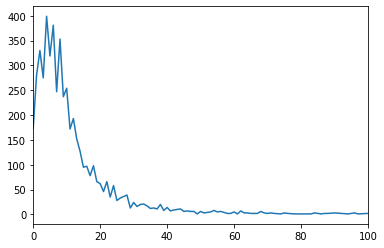

In [0]:
df_all['總價元'] = df_all['總價元'].astype(int)
(df_all['總價元']/1000000).round().value_counts().sort_index(ascending=True)[:100].plot()

確認沒有為0的ROW 
故直接平均
同時認定 交易標的數 即為 總件數

In [0]:
round(df_all['總價元'].mean())

15264496

In [0]:
df_all['車位總價元'] = df_all['車位總價元'].astype(int)
df_all['車位移轉總面積平方公尺'] = df_all['車位移轉總面積平方公尺'].astype(float)

In [0]:
#條件 僅計算有車位總價 有車位移轉總面積平方公尺 且交易筆棟數車位不為0 的項目
filter_park = (df_all['車位總價元'] != 0) & (df_all['車位移轉總面積平方公尺']!=0) & (df_all['車位']!=0)
filter_cols = ['車位類別','車位移轉總面積平方公尺','車位','車位總價元','車位均價元']
#將車位總價 除以 車位數 作為 車位均價元
df_all['車位均價元'] =df_all['車位總價元'] / df_all['車位'] 
df_all[filter_park][filter_cols]

,車位類別,車位移轉總面積平方公尺,車位,車位總價元,車位均價元
5,坡道機械,13.93,1,2300000,2300000.0
10,坡道平面,31.40,1,2500000,2500000.0
11,坡道平面,44.66,1,2000000,2000000.0
14,坡道平面,34.71,1,2450000,2450000.0
18,坡道平面,39.35,1,2700000,2700000.0
...,...,...,...,...,...
5146,坡道平面,40.56,1,1350000,1350000.0
5147,坡道平面,40.56,1,1350000,1350000.0
5148,坡道平面,40.56,1,1100000,1100000.0
5149,坡道平面,40.56,1,1250000,1250000.0


In [0]:
round(df_all[df_all['車位均價元'] != 0 ]['車位均價元'].mean())

1448749

In [0]:
#檢查一下實際分布與個人理解是否相近
df_all.groupby(['鄉鎮市區']).agg({'車位均價元':'mean'}).round().sort_values('車位均價元',ascending=False).head(10)

,車位均價元
鄉鎮市區,
松山區,2091250.0
中山區,1777512.0
中正區,1712500.0
新莊區,1699265.0
士林區,1678333.0
信義區,1536364.0
永和區,1505000.0
鶯歌區,1265217.0
龜山區,1256522.0


In [0]:
trade = df_all['交易標的'].count()
park = df_all['車位'].sum()
avg_price = df_all['總價元'].mean()
avg_park_price = df_all[df_all['車位均價元'] != 0 ]['車位均價元'].mean()

ans = pd.DataFrame([[trade, park, round(avg_price), round(avg_park_price)]])
ans.columns=['總件數', '總車位數', '平均總價元', '平均車位總價元']
ans

,總件數,總車位數,平均總價元,平均車位總價元
0,5173,2485,15264496,1448749


In [0]:
ans.to_csv('filter_b.csv', encoding='utf-8', index=False)